In [2]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../

33308
/media/work/docs/codes/QuCF/scripts-py


In [3]:
import pylib.mix as mix
from matplotlib import ticker
import time

path_old_ = "../results/LKW-1D-results/"
path_ = "../results/KIN1D1D-results/"
colors_     = ['b', 'r',  'g', 'gray', 'orange']
line_styles = ['-', '--', '--',    '-',     '-']

# cmap = 'seismic'
# cmap = 'bwr'
# cmap = 'jet'
# cmap = 'coolwarm'
cmap_one_sign_ = 'YlGn'
cmap_two_signs_= 'coolwarm'
def fmt_(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [26]:
# --- Create the matrix for the following system:
# i*g - v*E*exp(-v^2/) = 0, where g = g(v), and E does not depend on v;
# i*E + sum dv * v * E = 1/sqrt(2^nv);

vmax, nv = 6, 11
Nv = 1 << nv
v = np.linspace(-vmax, vmax, Nv)
dv = np.diff(v)[0]
A = np.zeros((2*Nv, 2*Nv), dtype = complex)
b = np.zeros(2*Nv)
coef = pow(2,-nv//2)
print("1/sqrt(2**nv) = {:0.3e}".format(coef))

flag_with_copies = True

if flag_with_copies:
    print("Case with copies")
    for ii in range(Nv,2*Nv):
        b[ii] = coef
    
    for ii in range(2*Nv):
        A[ii,ii] = 1j
        if ii < Nv:
            A[ii,ii+Nv] = - v[ii] * np.exp(-v[ii]*v[ii]/2.)
        if ii >= Nv:
            for kk in range(Nv):
                A[ii,kk] = dv * v[kk]     
else:
    print("Case without copies")
    b[Nv] = coef
        
    for ii in range(2*Nv):
        A[ii,ii] = 1j
        if ii < Nv:
            A[ii,Nv] = - v[ii] * np.exp(-v[ii]*v[ii]/2.)
        if ii >= Nv:
            A[Nv,ii-Nv] = dv * v[ii-Nv]
                
del coef

1/sqrt(2**nv) = 1.562e-02
Case with copies


In [27]:
# --------------------------------------------------------
# --- Find the condition number of A ---
# --------------------------------------------------------
import time

print("Nv: {:d}".format(Nv))

print("--------------------------------------------")
print("--- Condition number of A ---")
start = time.perf_counter()
_, s, _ = np.linalg.svd(A)
kappa = np.max(np.abs(s)) / np.min(np.abs(s[np.nonzero(s)]))
print("\tcondition number of A: \t\t{:0.3e}".format(kappa))
end   = time.perf_counter()
print("elapsed time: {:0.3e} s".format(end - start))
del s, kappa

Nv: 2048
--------------------------------------------
--- Condition number of A ---
	condition number of A: 		1.193e+03
elapsed time: 2.981e+01 s


In [ ]:
# --- without copies ---
Nv, kappa: 8,    3.010e+02
Nv, kappa: 64,   4.749e+01  
Nv, kappa: 128,  3.444e+01  
Nv, kappa: 256,  3.810e+01
Nv, kappa: 512,  5.420e+01
Nv, kappa: 1024, 8.318e+01
Nv, kappa: 2048, 1.366e+02  

# --- with copies --
Nv, kappa: 8,    1.917e+03
Nv, kappa: 64,   1.267e+03  
Nv, kappa: 128,  1.228e+03  
Nv, kappa: 256,  1.210e+03
Nv, kappa: 512,  1.200e+03
Nv, kappa: 1024, 1.196e+03
Nv, kappa: 2048, 1.193e+03

In [28]:
# --- Solve the system ---
A_inv = np.linalg.inv(A)
psi = np.dot(A_inv, b)

g = np.array(psi[:Nv])
E_copies = np.array(psi[Nv:2*Nv])

<IPython.core.display.Javascript object>


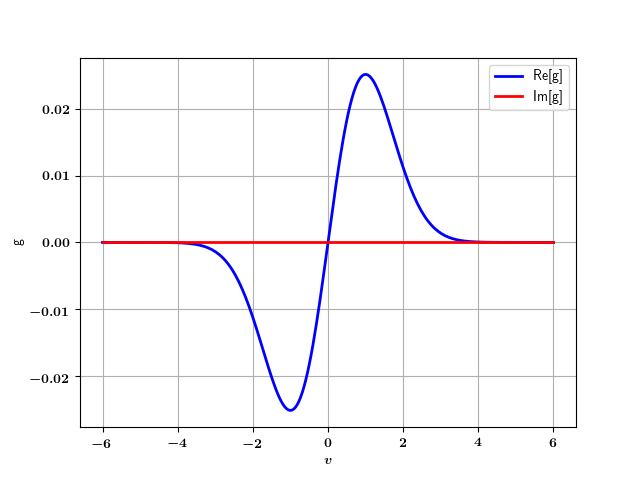

E-copies[0] = 0.000e+00 + 4.148e-02*i
E-copies[1] = 0.000e+00 + 0.000e+00*i
E-copies[10] = 0.000e+00 + 0.000e+00*i


In [26]:
# --- Plot results ---
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(v, np.real(g), color='b', linewidth = 2, linestyle='-', label="Re[g]")
ax.plot(v, np.imag(g), color='r', linewidth = 2, linestyle='-', label="Im[g]")
plt.xlabel('$v$')
plt.ylabel("g")
ax.legend()
plt.grid(True)
plt.show()

kk = 0
Er, Ei = np.real(E_copies[kk]), np.imag(E_copies[kk]) 
print("E-copies[{:d}] = {:0.3e} + {:0.3e}*i".format(kk, Er, Ei))

kk = 1
Er, Ei = np.real(E_copies[kk]), np.imag(E_copies[kk]) 
print("E-copies[{:d}] = {:0.3e} + {:0.3e}*i".format(kk, Er, Ei))

kk = 10
Er, Ei = np.real(E_copies[kk]), np.imag(E_copies[kk]) 
print("E-copies[{:d}] = {:0.3e} + {:0.3e}*i".format(kk, Er, Ei))

del kk, Er, Ei

<IPython.core.display.Javascript object>


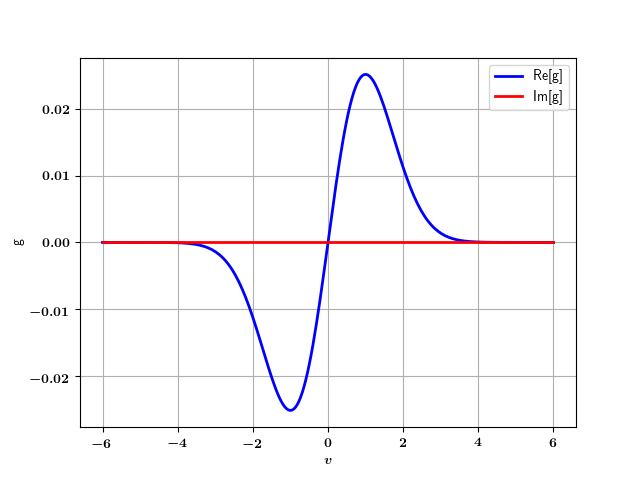

E-copies[0] = 0.000e+00 + 4.148e-02*i
E-copies[1] = 0.000e+00 + 4.148e-02*i
E-copies[10] = 0.000e+00 + 4.148e-02*i


In [29]:
# --- Plot results ---
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(v, np.real(g), color='b', linewidth = 2, linestyle='-', label="Re[g]")
ax.plot(v, np.imag(g), color='r', linewidth = 2, linestyle='-', label="Im[g]")
plt.xlabel('$v$')
plt.ylabel("g")
ax.legend()
plt.grid(True)
plt.show()

kk = 0
Er, Ei = np.real(E_copies[kk]), np.imag(E_copies[kk]) 
print("E-copies[{:d}] = {:0.3e} + {:0.3e}*i".format(kk, Er, Ei))

kk = 1
Er, Ei = np.real(E_copies[kk]), np.imag(E_copies[kk]) 
print("E-copies[{:d}] = {:0.3e} + {:0.3e}*i".format(kk, Er, Ei))

kk = 10
Er, Ei = np.real(E_copies[kk]), np.imag(E_copies[kk]) 
print("E-copies[{:d}] = {:0.3e} + {:0.3e}*i".format(kk, Er, Ei))

del kk, Er, Ei

--- Plotting A matrix ---
A_real_max = 6.065e-01
A_imag_max = 1.000e+00


<IPython.core.display.Javascript object>


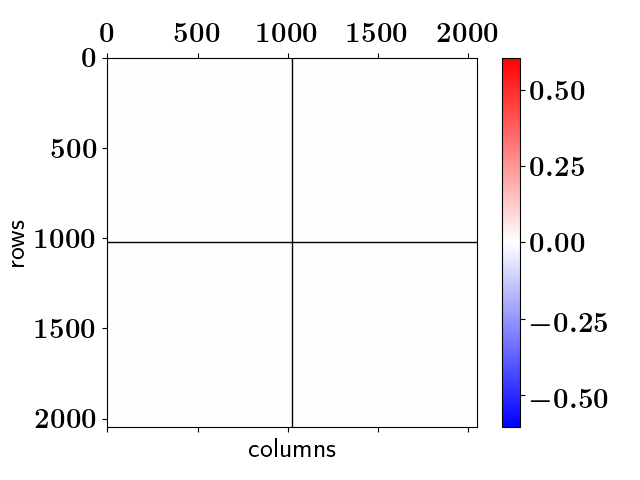

<IPython.core.display.Javascript object>


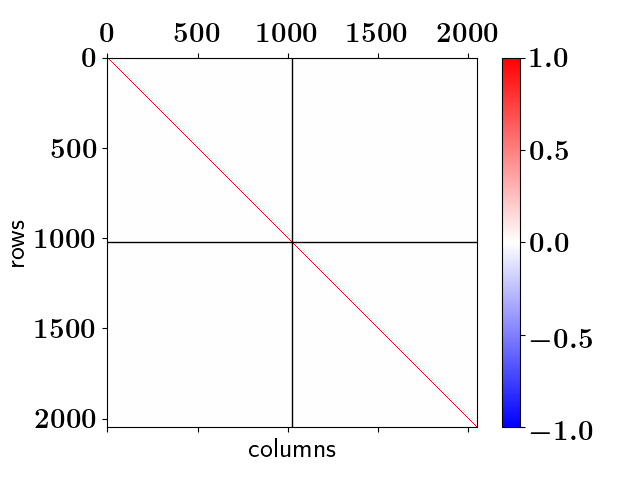

In [23]:
# --- Plot the matrix ---
from matplotlib import ticker

cmap = 'seismic'
cmap = 'bwr'
# cmap = 'bwr'
# cmap = 'jet'
# cmap = 'coolwarm'
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)


def plot_matrix(B, name):
    print("--- Plotting {:s} matrix ---".format(name))
    fontsize = 20
    
    Br_max = np.max(np.max( np.abs(B.real) ))
    Bi_max = np.max(np.max( np.abs(B.imag) ))

    print(name + "_real_max = {:0.3e}".format(Br_max))
    print(name + "_imag_max = {:0.3e}".format(Bi_max))

    # ------------------------------------------------------------------------------
    # --- Real part ---
    fig1 = plt.figure()
    ax = fig1.add_subplot(111)
    cs = ax.matshow(B.real, cmap=cmap, vmin=-Br_max, vmax = Br_max)
    plt.xlabel('columns', fontsize = fontsize)
    plt.ylabel("rows", fontsize = fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    cbar1 = fig1.colorbar(cs, ax = ax)
    cbar1.ax.tick_params(labelsize=fontsize)
    
    ax.axvline(x = Nv-0.5, color = 'black', linewidth = 1, linestyle = "-")
    ax.axhline(y = Nv-0.5, color = 'black', linewidth = 1, linestyle = "-")
        
    # ------------------------------------------------------------------------------
    # --- Imaginary part ---
    fig2 = plt.figure()
    ax = fig2.add_subplot(111)
    cs = ax.matshow(B.imag, cmap=cmap, vmin=-Bi_max, vmax = Bi_max)
    plt.xlabel("columns", fontsize = fontsize)
    plt.ylabel("rows", fontsize = fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    cbar2 = fig2.colorbar(cs, ax = ax)
    cbar2.ax.tick_params(labelsize=fontsize)
    
    ax.axvline(x = Nv-0.5, color = 'black', linewidth = 1, linestyle = "-")
    ax.axhline(y = Nv-0.5, color = 'black', linewidth = 1, linestyle = "-")
    
    return fig1, fig2

figA_real, figA_imag = plot_matrix(A, "A")